# Collecting metrics from triple line images

Leanne Friedrich 9/23/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [17]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
import py.file_handling as fh
from py.tools.config import cfg
import py.tools.logs as logs
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [3]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

# measuring stills

In [24]:
import cv2 as cv
from imshow import imshow
from pic_stitch_bas import stitchSorter
from file_handling import isSubFolder
import vidCrop as vc
import vidMorph as vm
from imshow import imshow
from plainIm import *
from val_print import *

INFO: Threshold: 75, product: 16.054375, white:80


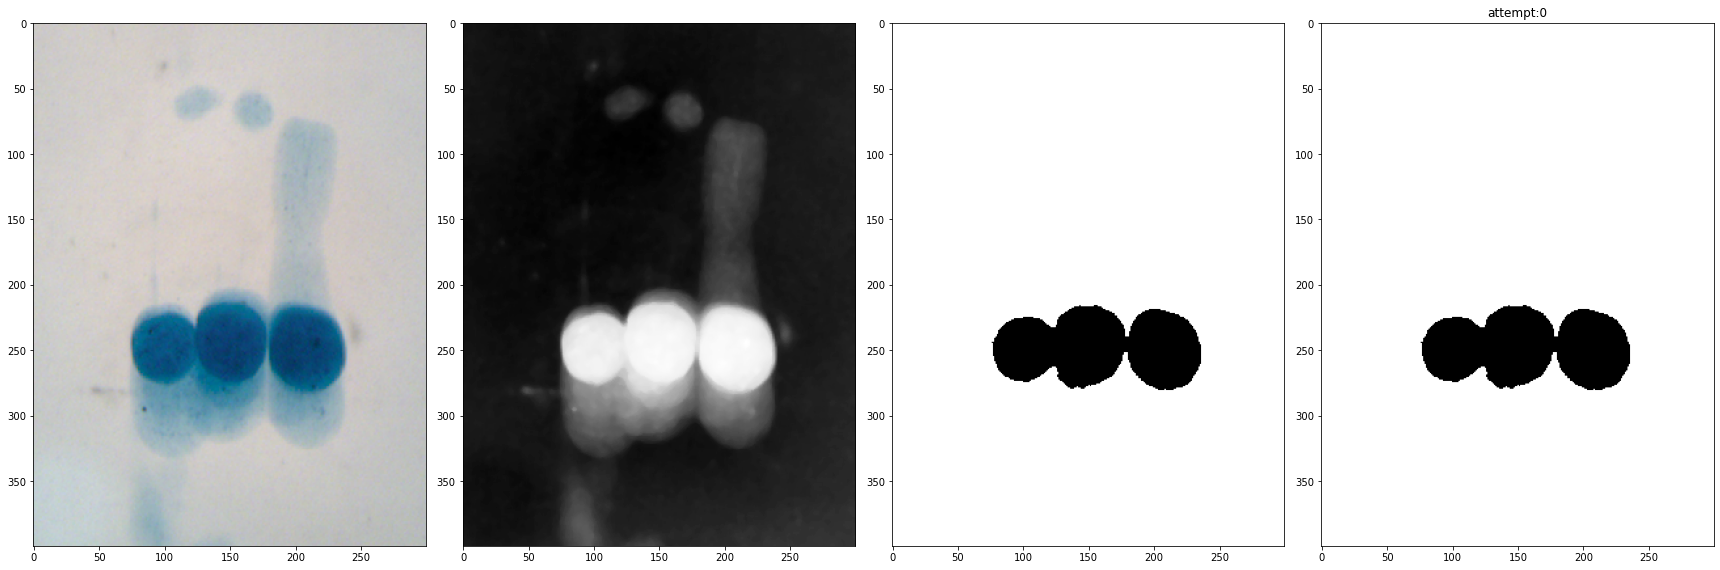

In [45]:
im = cv.imread(os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_4.00_S_2.25\I_4.00_S_2.25_220706\tripleLinesXS_+y_1.250\tripleLinesXS_+y_1.250_HIPxs_1_stitch_1_I_4.00_S_2.25_220706_160604_9.png'))
im2, markers, attempt = vm.segmentInterfaces(im, acrit=100, botthresh=75, topthresh=75, diag=2)

INFO: Threshold: 75, product: 8.162125, white:80


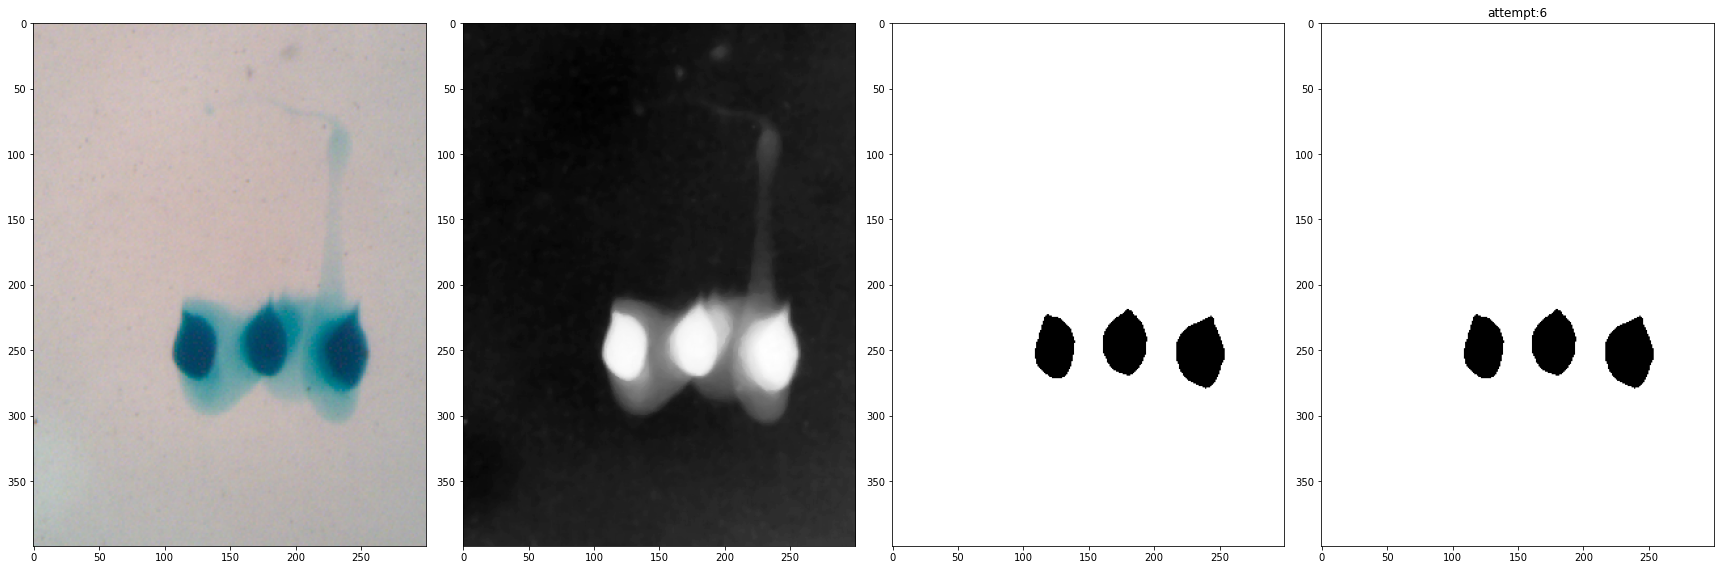

In [118]:
im = cv.imread(os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_3.00_S_2.75\I_3.00_S_2.75_220909\tripleLinesXS_+y_1.250\tripleLinesXS_+y_1.250_HIPxs_1_stitch_1_I_3.00_S_2.75_220909_160437_3.png'))
im2, markers, attempt = vm.segmentInterfaces(im, acrit=100, botthresh=75, topthresh=75, diag=2)

In [65]:
attempt

0

In [68]:
markers

(4,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[     0,      0,    300,    400, 116159],
        [   161,    219,     34,     51,   1251],
        [   109,    223,     31,     49,   1121],
        [   217,    224,     37,     56,   1469]], dtype=int32),
 array([[148.3616078 , 197.87577372],
        [177.53317346, 244.92885691],
        [123.85548617, 248.08296164],
        [235.21307012, 252.172226  ]]))

In [110]:
file = os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_4.00_S_2.25\I_4.00_S_2.25_220706\tripleLinesXS_+y_1.250\tripleLinesXS_+y_1.250_HIPxs_1_stitch_1_I_4.00_S_2.25_220706_160604_9.png')
spl = re.split('xs', os.path.basename(file))
name = re.split('_', spl[0])[-1] + 'xs' + re.split('_', spl[1])[1]
name

'HIPxs1'

In [156]:
print(file)
fh.fileScale(file)

//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/tripleLines\LapRD_LapRD_visc\I_4.00_S_2.25\I_4.00_S_2.25_220706\tripleLinesXS_+y_1.250\tripleLinesXS_+y_1.250_HIPxs_1_stitch_1_I_4.00_S_2.25_220706_160604_9.png


'1.0'

({'line': 'HIPxs1',
  'aspect': 0.37579617834394907,
  'xshift': 0.01592356687898089,
  'yshift': -0.0423728813559322,
  'area': 6417.0,
  'w': 157.0,
  'h': 59.0,
  'porosity': 0.15687820260149787,
  'excessPerimeter': 0.3125461414535875},
 {'line': '',
  'aspect': 'h/w',
  'xshift': 'w',
  'yshift': 'h',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'porosity': '',
  'excessPerimeter': ''})

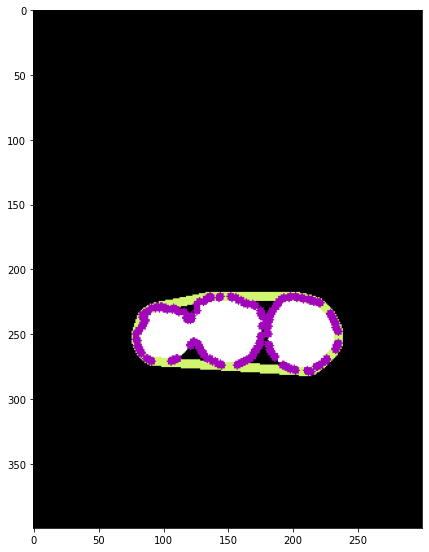

In [161]:
me.xs3Measure(file, diag=1)

({'line': 'HIPxs1',
  'aspect': 1.0694444444444444,
  'xshift': 0.013888888888888888,
  'yshift': -0.006493506493506494,
  'area': 3174.0,
  'w': 72.0,
  'h': 77.0,
  'porosity': 0.19747155499367886,
  'excessPerimeter': 0.3995524665204604},
 {'line': '',
  'aspect': 'h/w',
  'xshift': 'w',
  'yshift': 'h',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'porosity': '',
  'excessPerimeter': ''})

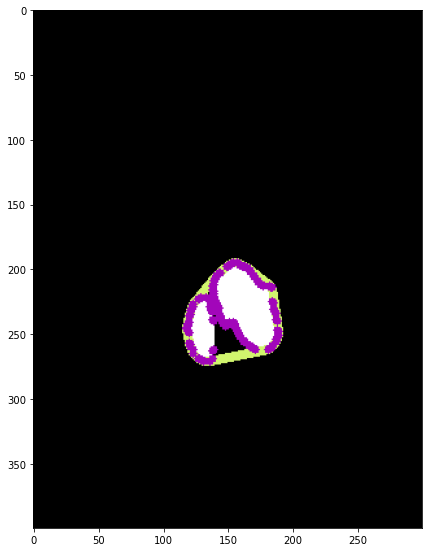

In [162]:
file = os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_3.00_S_2.75\I_3.00_S_2.75_220909\tripleLinesXS_+y_0.500\tripleLinesXS_+y_0.500_HIPxs_1_stitch_1_I_3.00_S_2.75_220909_160326_2.png')
me.xs3Measure(file, diag=1)

({'line': 'HOPxs1',
  'aspect': 6.5,
  'xshift': -0.029411764705882353,
  'yshift': 0.12895927601809956,
  'area': 4071.0,
  'w': 34.0,
  'h': 221.0,
  'porosity': 0.36005659042678617,
  'excessPerimeter': -0.07137555250068617},
 {'line': '',
  'aspect': 'h/w',
  'xshift': 'w',
  'yshift': 'h',
  'area': 'px',
  'x0': 'px',
  'y0': 'px',
  'w': 'px',
  'h': 'px',
  'porosity': '',
  'excessPerimeter': ''})

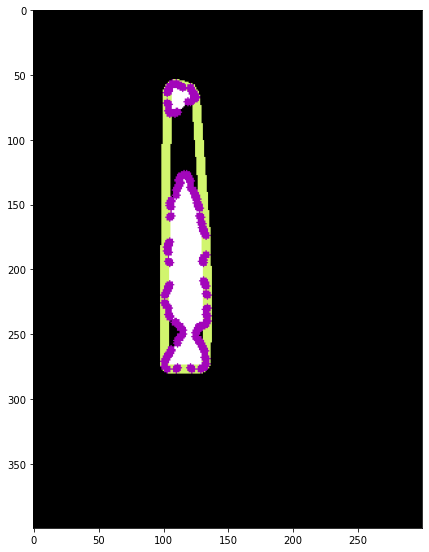

In [163]:
file = os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_3.50_S_4.00\I_3.50_S_4.00_220909\tripleLinesXS_+z_0.750\tripleLinesXS_+z_0.750_HOPxs_1_stitch_1_I_3.50_S_4.00_220909_171315_4.png')
me.xs3Measure(file, diag=1)

In [63]:
df = vm.markers2df(markers)
df

,x0,y0,w,h,a,xc,yc
1,161,219,34,51,1251,177.53,244.93
2,109,223,31,49,1121,123.86,248.08
3,217,224,37,56,1469,235.21,252.17


INFO: Threshold: 75, product: 8.616875, white:80


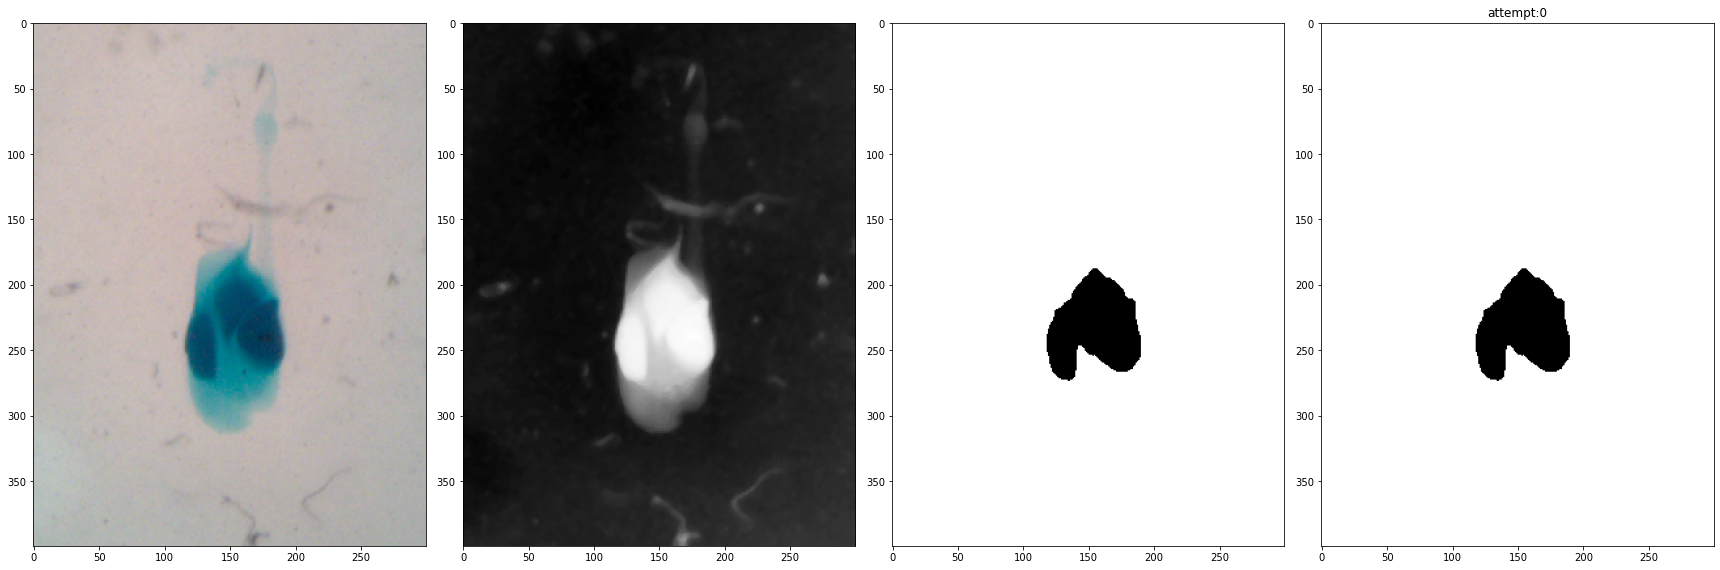

In [47]:
im = cv.imread(os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_3.00_S_2.75\I_3.00_S_2.75_220909\tripleLinesXS_+y_0.500\tripleLinesXS_+y_0.500_HIPxs_1_stitch_1_I_3.00_S_2.75_220909_160326_2.png'))
im2, markers, attempt = vm.segmentInterfaces(im, acrit=100, botthresh=75, topthresh=75, diag=2)

INFO: Threshold: 75, product: 11.923375, white:80


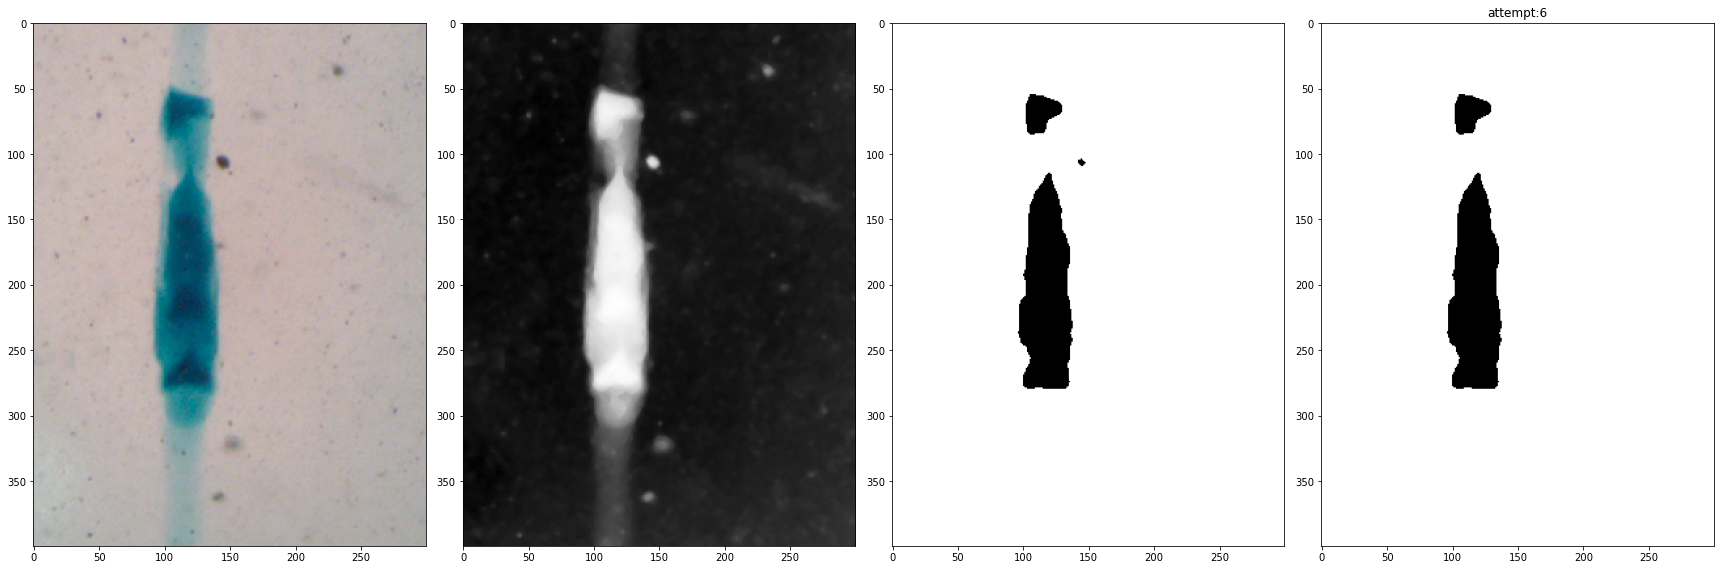

In [108]:
im = cv.imread(os.path.join(cfg.path.server, 'tripleLines', r'LapRD_LapRD_visc\I_3.50_S_4.00\I_3.50_S_4.00_220909\tripleLinesXS_+z_0.750\tripleLinesXS_+z_0.750_HOPxs_1_stitch_1_I_3.50_S_4.00_220909_171315_4.png'))
im2, markers, attempt = vm.segmentInterfaces(im, acrit=100, botthresh=75, topthresh=75, diag=2)

INFO: Threshold: 160, product: 29.9285, white:80


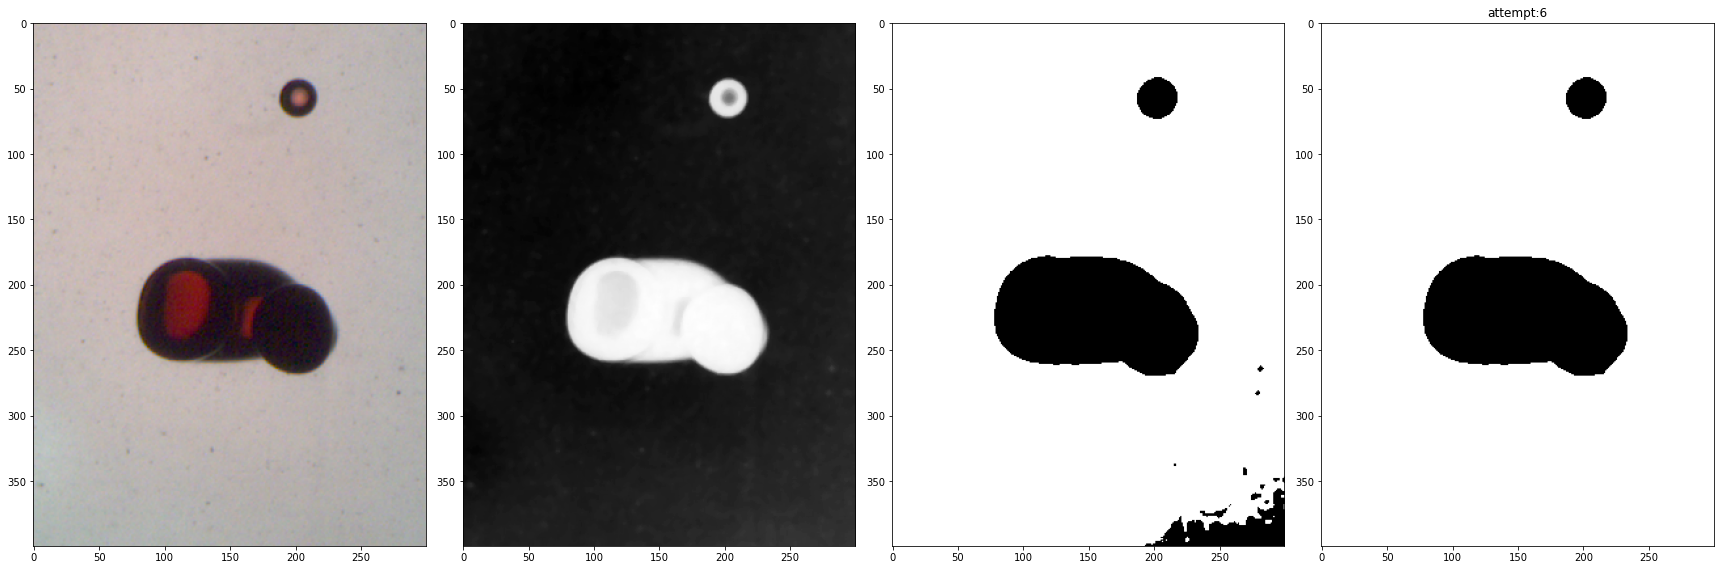

In [107]:
im = cv.imread(os.path.join(cfg.path.server, 'tripleLines', r'mineral_LapRD_visc\I_M9_S_3.00\I_M9_S_3.00_220907\tripleLinesXS_+y_1.250\tripleLinesXS_+y_1.250_HIPxs_1_stitch_1_I_M9_S_3.00_220907_160608_1.png'))
im2, markers, attempt = vm.segmentInterfaces(im, acrit=100, diag=2)

In [50]:
df = vm.markers2df(markers)
df

,x0,y0,w,h,a,xc,yc
1,187,42,31,32,770,201.99,57.66
2,78,178,156,92,11139,153.75,223.51
3,279,262,5,5,15,280.80,264.20
4,277,281,4,4,10,278.70,282.70
5,215,337,2,2,4,215.50,337.50
6,268,340,3,6,17,268.94,342.65
7,291,348,5,3,12,292.92,348.75
8,281,353,4,4,11,282.18,354.09
9,274,359,8,6,32,277.12,361.56
10,284,365,4,3,9,285.67,365.89


0.00876771847989577

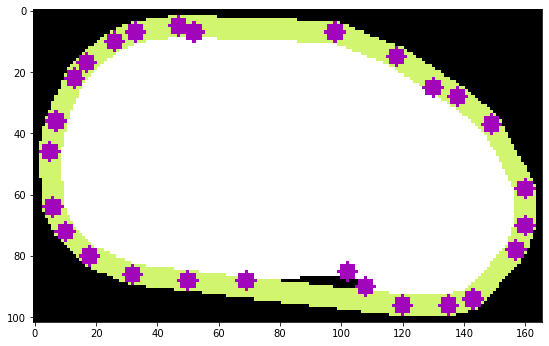

In [58]:
me.getRoughness(im2, diag=1)